## Research Assignment 6

#### Goal: Understand Dark Matter halo evolution for MW and M31 merger

In this code the focus will be to plot how the circular velocity for the halo of MW and M31 changes through the merger. 

Plan for aditional plot will be provided that shows the how ASAM (or spin paramater, if time allows) evolves during the merger.

#### Plot 1

plot halo circular velocity profile 

In [2]:
# import modules
import numpy as np
import astropy.units as u

import matplotlib
import matplotlib.pyplot as plt
import astropy.table as tbl

from ReadFile import Read
from CenterOfMass import CenterOfMass
from Mass_Profile import MassProfile

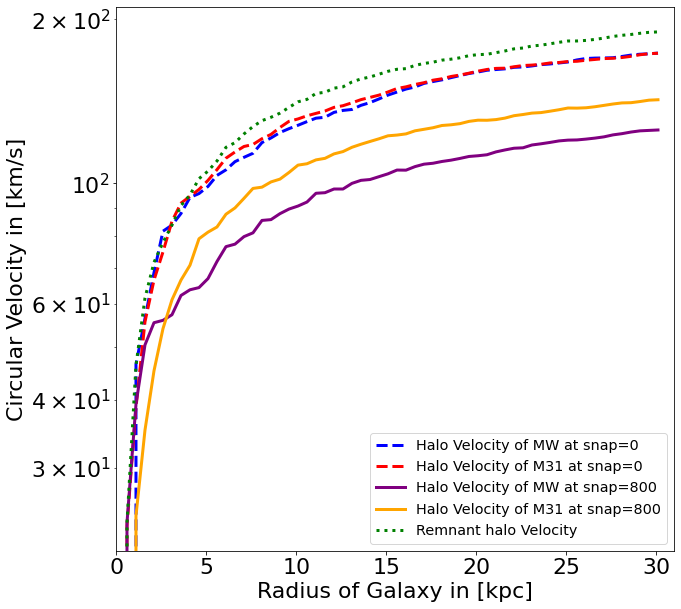

In [6]:
fig = plt.figure(figsize=(10,10))  # sets the scale of the figure
ax = plt.subplot(111) 

r = np.arange(0.1, 30.5, 0.5) 

MW = MassProfile("txtfiles/MW", 0) 
M31 = MassProfile("txtfiles/M31", 0)

MW_end = MassProfile("txtfiles/MW", 800) 
M31_end = MassProfile("txtfiles/M31", 800)

# plot MW halo velocity before merger
ax.semilogy(r, MW.CircularVelocity(1, r), color="blue", linestyle="--", 
            linewidth=3, label='Halo Velocity of MW at snap=0')
# plot M31 halo velocity before merger
ax.semilogy(r, M31.CircularVelocity(1, r), color="red", linestyle="--",
            linewidth=3, label='Halo Velocity of M31 at snap=0')
# plot MW halo velocity after merger
ax.semilogy(r, MW_end.CircularVelocity(1, r), color="purple",
            linewidth=3, label='Halo Velocity of MW at snap=800')
# plot M31 halo velocity after merger
ax.semilogy(r, M31_end.CircularVelocity(1, r), color="orange", 
            linewidth=3, label='Halo Velocity of M31 at snap=800')

total_circ_vel_remnant = np.sqrt(MW_end.CircularVelocity(1, r)**2 + M31_end.CircularVelocity(1, r)**2)
# plot hernquist velocity
ax.semilogy(r, total_circ_vel_remnant, color="green", 
            linestyle=":", linewidth=3, label='Remnant halo Velocity')

# Add labels
plt.xlabel('Radius of Galaxy in [kpc]', fontsize=22)
plt.ylabel(r'Circular Velocity in [km/s]', fontsize=22)

#set axis limits
plt.xlim(0,31)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='lower right',fontsize='x-large')

#### Plot 2
Average Specific Angular Momentim (ASAM) of galaxy halo

In [4]:
class ASAM:

    def __init__(self, galaxy, snap):
        """ Class to compute average specific angular momentum of a 
        galaxy at given snapshot
        
        PARAMETERS
        ----------
        galaxy : `str: "MW", "M31" or "M33"`
            galaxy name 
        snap : `int: 0, 1, etc.`
            snapshot number
        """
        # add a string of the filenumber to the alue "000"
        ilbl = '000' + str(snap)
        # remove all but last 3 digits
        ilbl = ilbl[-3:]
        self.filename = "%s_"%(galaxy) + ilbl + '.txt'
        
        # read data in the given file using Read
        self.time, self.total, self.data = Read(self.filename)                                                                                             

        # store the mass, positions, and velocities of all the particles 
        self.m = self.data['m']

        self.x = (self.data['x']) * u.kpc
        self.y = (self.data['y']) * u.kpc
        self.z = (self.data['z']) * u.kpc
        
        self.vx = self.data['vx'][self.index]
        self.vy = self.data['vy'][self.index]
        self.vz = self.data['vz'][self.index]
        
        # store galaxy name as global property
        self.gname = galaxy

    def SpecAngularMomentum (self, ptype):
        """ This function computes the specific angular momentum of given 
        particle type in a galaxy.
        
        INPUTS:
        -------
        ptype: `int: 1, 2, 3`
            represents particle typr for the galaxy (halo, disk, bulge)
       
        OUTPUTS:
        --------
        SAM : `numpy array`
            specific angular momtem for all particles of ptype

        """
        # compute array of 'r' for all particles
        # r = [x, y, z]
        
        
        # compute array of 'v' for all particles
        # v = [vx, vy, vz]
        
        
        # use formula h = r x v, to find specific angular momentum of each particle
        # use np.cross / matrix multiplication
        
        
        return #SAM

    
    def AvgSpecAngularMomentum (self, ptype):
        """ This function computes the specific angular momentum of given 
        particle type in a galaxy.
        
        INPUTS:
        -------
        ptype: `int: 1, 2, 3`
            represents particle typr for the galaxy (halo, disk, bulge)
       
        OUTPUTS:
        --------
        ASAM : `array`
            specific angular momtem for all particles of ptype

        """
        # find the magnitude of SAM vector
        # remember SAM is a vector
        # |h| = sqrt(hx^2+hy^2+hz^2)
        
        
        # compute average of all SAM magnitudes
        
        
        return #ASAM
        

In [ ]:
# Average Specific Angular Momentum of MW before merger
MW_AM = ASAM("txtfiles/MW", 0)
MW_AM.AvgSpecAngularMomentum(1)

In [ ]:
# Average Specific Angular Momentum of MW before merger
M31_AM = ASAM("txtfiles/M31", 0)
M31_AM.AvgSpecAngularMomentum(1)

In [ ]:
# Average Specific Angular Momentum of Remnant
# Compute average of MW_AM.AvgSpecAngularMomentum(800) and M31_AM.AvgSpecAngularMomentum(800)


Function to create a plot for ASAM to see how it evolves with time.

In [ ]:
def ASAM_time(galaxy, ptype, start, end, n):
    """ Function to determine how the ASAM value of a galaxy evolves with time
    
    INPUTS:
    --------
    galaxy: `string: "MW", "M31" or "M33"`
        galaxy name
    ptype: `int: 1, 2, 3`
        represents particle typr for the galaxy (halo, disk, bulge)
    start : `float`
        number of the first snapshot to read
    end : `float`
        number of the last snapshot to read
    n : `integer`
        number of intervals to itterate over 
        
    OUTPUTS:
    ---------
    ASAM_values : `array`
        ASAM value for the galaxy ate each snap shot from 'start' to 'end'
    
    """
    # compose the filename for output
    fileout = "ASAM_values_" + "%s"%(galaxy) + ".txt"
    
    # minimum interval between snapshots is 1
    if n<1:
        n=1
    # generate the snapshot id sequence    
    snap_ids = np.arange(start, end, n)
    
    # initialize the array for ASAM info
    ASAM_values = np.zeros([len(snap_ids)], 2)
    
    
    # loop over files
     for i, snap_id in enumerate(snap_ids):
        ilbl = '000' + str(snap_id)
        # remove all but last 3 digits
        ilbl = ilbl[-3:]
        path = "C:/Users/sanvi/OneDrive/Desktop/ASTR 400B/400B_2023_Khairnar/Homeworks/Homework6/txtfiles/"
        filename = path + "%s_"%(galaxy) + ilbl + '.txt'
        
        ASAM_function = ASAM(filename, snap_id)
        
        ASAM_values[i,0] = ASAM_function.time.value/1000 # time in Column 1 in Gyr
        ASAM_values[i,1] = ASAM_function.AvgSpecAngularMomentum(ptype)
    
    # write the data to a file
    np.savetxt(fileout, ASAM_values, fmt = "%11.3f"*2, comments='#',
               header="{:>10s}{:>11s}"\
                      .format('t', 'ASAM'))    
    

In [ ]:
fig = plt.figure(figsize=(10,10))  # sets the scale of the figure
ax = plt.subplot(111) 

MW_ASAM = ASAM_time("MW", 1, 0, 800, 20) 
M31_ASAM = ASAM_time("M31", 1, 0, 800, 20) 

time =MW_COMdata[:,0] 

# plot MW halo velocity before merger
ax.semilogy(time, MW_ASAM[:,1], color="blue", linestyle="--", 
            linewidth=3, label='Avg Specific Ang Momentum of MW')
# plot M31 halo velocity before merger
ax.semilogy(time, M31_ASAM[:,1], color="red", linestyle="--",
            linewidth=3, label='Avg Specific Ang Momentum of M31')


# Add labels
plt.xlabel('Time in [Gyr]', fontsize=22)
plt.ylabel(r'Average Specific Angular Momentum in [rad/s]', fontsize=22)

#set axis limits
plt.xlim(0,31)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='lower right',fontsize='x-large')

#### Escape speed of remnant

escape speed is given as $(v_{esc}(x))^2 = 2*|\phi(x)|$ 

For galaxy, the potential can be computed using $\nabla^2 \phi = 4\pi G \rho$

Thus if we know the density profile of the galaxy (or MW-M31 remnant) we can find its escape velocity as function of radius 